In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

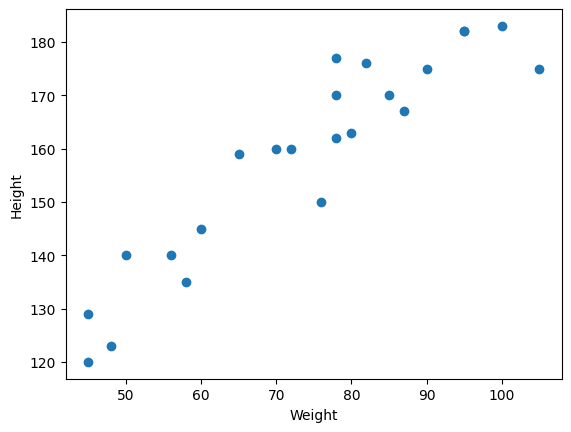

In [5]:
# scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


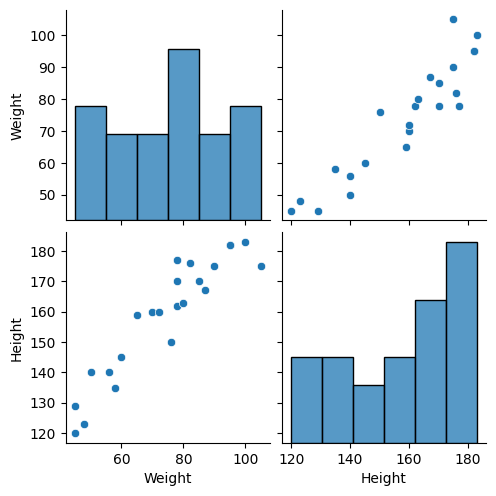

In [9]:
# Seaborn for better visualization
import seaborn as sns
sns.pairplot(df)

In [16]:
# divide independent and dependent variables
X = df[['Weight']] # independent features should be dataframe or 2 dimensional array.
Y = df['Height'] # dependent feature can be series or 1 dimensional array.
# np.array(X).shape

In [12]:
# if double square brackets are not used, it will be a series and not a dataframe.
X_Series = df['Weight']
np.array(X_Series).shape

(23,)

In [15]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [19]:
# Step2 : train Test Split
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [21]:
X_train.shape

(17, 1)

In [22]:
## Standardization -> bringing the data to a common scale (i.e commoon values)
## The Z-Score formula is used to standardize the data.
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler() # The Z-Score formula is used to standardize the data.
X_train = scaler.fit_transform(X_train) # will be applied to the training data

In [24]:
# We apply transform and not fit_transform to the test data because we want to use the same scaling parameters (mean and standard deviation) that were calculated from the training data. This is to prevent data leakage and ensure that the model generalizes well to unseen data.
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [26]:
# Step 3 : Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [28]:
 # initialize the object
regression = LinearRegression()

In [29]:
# proof that if we didnt created dataframe, it will give error
regression.fit(X_Series,Y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [30]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
#Checking the coefficients
regression.coef_

array([17.2982057])

In [32]:
# checking the intercept
regression.intercept_

np.float64(156.47058823529412)

In [33]:
#printing both coefficients and intercept
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


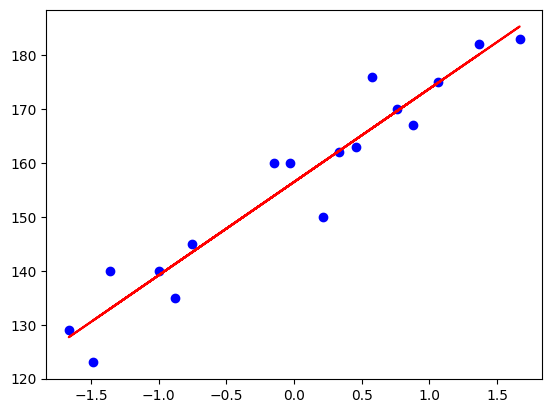

In [35]:
# plot best fit line eith respect to training data
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,regression.predict(X_train),color='red')

### Prediction of test data
1. predicted height output  = intercept + coef_(Weights)
2. y_pred_test = 156.470 + 17.29(X_test)

In [36]:
# prediction fot test data
Y_pred = regression.predict(X_test)

In [37]:
Y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [38]:
# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
# note we are calculating the error on test data
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  114.84069295228699
Mean Absolute Error:  9.66512588679501
Root Mean Squared Error:  10.716374991212605


In [40]:
# finding the R2 score
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print("R2 Score: ", score)

R2 Score:  0.7360826717981276


## Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
where

R2: The R2 of the model

n: no of observations

k: The number of predictor variables i.e independent features

In [44]:
# finding adjusted R2 score
# we will need to use the formula
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6701033397476595

## Linear Regression using OLS technique

In [46]:
import statsmodels.api as sm

In [47]:
model = sm.OLS(Y_train,X_train).fit()

In [48]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                       0.664
Time:                        18:13:16   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
# Prediction for new data
regression.predict([[72]])

array([1401.94139895])

In [51]:
# Why so high value for weight = 72?
# because we have not scaled the new data, so it is not in the same scale as the training data.
# We need to scale the new data using the same scaler that we used for the training data
regression.predict(scaler.transform([[72]]))

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])